In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load the saved model
model = load_model("waste_classification_model.keras")
print("Model loaded successfully.")

Model loaded successfully.


/Users/bixentesehabiague/anaconda3/envs/monenv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
# Prepare the test data generator (ensure the path is correct)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    "DATASET/TEST",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Ensure consistent order for confusion matrix
)

Found 2513 images belonging to 2 classes.


In [13]:
# Make predictions on the test set
y_pred = (model.predict(test_generator) > 0.5).astype(int).flatten()
y_true = test_generator.classes

/Users/bixentesehabiague/anaconda3/envs/monenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step


<Figure size 800x800 with 0 Axes>

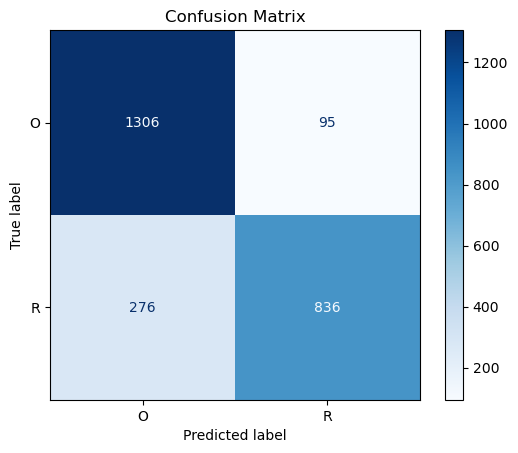

In [14]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()